In [1]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
import collections
import re
import nltk
!pip install tika
import tika
import glob
tika.initVM()
import seaborn as sns
from tika import parser
from nltk.stem import SnowballStemmer
import os
import pandas as pd
import gensim, nltk, os
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
import gensim
from gensim import corpora
import pickle
import random
from gensim import corpora, models
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sapnasharma/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sapnasharma/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Do as follows if guidedlda in not getting installed with pip

from command window

git clone https://github.com/vi3k6i5/GuidedLDA
cd GuidedLDA
ls
sh build_dist.sh
python setup.py sdist
pip3 install -e .

pip3 install -U cython

remove the following 2 lines from setup.cfg:

[sdist]
pre-hook.sdist_pre_hook = guidedlda._setup_hooks.sdist_pre_hook




In [2]:
'''
pre processing steps on the entire dataset
'''
# importing customized stopwords from customized_stopwords.txt
with open ('customized_stopwords', 'rb') as fp:
    customized_stopwords = pickle.load(fp)
more_stop_words = ['issue','options','difference','wouldn','morning','current','worry','short','school','plan','guest','bring','depend','latest','mention','earlier','read','simple','spend','include','friend','question','couldn','option','happen','finish','start','tomorrow','work','agree','think','middle','dicide','write','haven','understand','print','call','return','talk','happen']   
customized_stopwords=more_stop_words + customized_stopwords  
#stemmer = SnowballStemmer("english")
def lemmatize(word):                                    # input is a word that is to be converted to root word for verb
    return WordNetLemmatizer().lemmatize(word, pos = 'v')

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if (token not in gensim.parsing.preprocessing.STOPWORDS) and (len(token) > 4) and (token not in customized_stopwords):
            token = lemmatize(token)
            if token not in customized_stopwords:
                result.append(lemmatize(token))
                
    return result

In [38]:
# reading all documents
combined_words = ""
docs = []
i=0
for transcript_file_name in glob.iglob('./transcripts/train//*.*', recursive=True):
    print(os.path.basename(transcript_file_name))
    data = open(transcript_file_name).readlines()
    speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
    words_in_file = ""
    speaker_dic ={}
    for name,words in  speaker_data.items():
        words = words.replace("\n","").lower()
        words_in_file = words_in_file + words
        if name.split("_")[0] in speaker_dic:
            speaker_dic[name.split("_")[0]] += words
        else:
            speaker_dic[name.split("_")[0]] = words
    #print("Words:",str(len(words_in_file)))
    i+=1
    combined_words += words_in_file
    #print(collections.Counter(preprocess(words_in_file)).most_common(5))
    docs.append([words_in_file])
print ( "Total Transcripts : ",str(i))
        

autosampler-Onfido_2020-07-10_transcript.txt
Embedder_2020-07-16_transcript.txt
Embedder_2020-07-03_transcript.txt
Speech_Diarization_2020-07-22_transcript.txt
autosampler-Onfido_2020-07-17_transcript.txt
Embedder.m4a_transcript_2.txt
Website_Optimization_2020-07-20_transcript.txt
Website_Optimization_2020-08-03_transcript.txt
Website_Optimization_2020-07-28_transcript.txt
Embedder.m4a_transcript_3.txt
Embedder_2020-07-10_transcript.txt
Embedder.m4a_transcript_1.txt
Website_Optimization_2020-08-04_transcript.txt
Speech_Diarization_2020-07-23_transcript.txt
Embedder_2020-07-02_transcript.txt
autosampler-Onfido_2020-07-13_transcript.txt
Embedder_2020-07-15_transcript.txt
Website_Optimization_2020-07-22_transcript.txt
Embedder_2020-07-13_transcript.txt
Website_Optimization_2020-07-23_transcript.txt
Speech_Diarization_2020-08-04_transcript.txt
Speech_Diarization.m4a_transcript.txt
Speech_Diarization_2020-07-28_transcript.txt
Speech_Diarization_2020-08-03_transcript.txt
autosampler-Onfido_2

In [4]:
#combined_words
cleaned_combined_words = []
for word in combined_words.split(" "):
    cleaned_combined_words += preprocess(word)
cleaned_combined_words = " ".join(cleaned_combined_words)
    

In [5]:
#cleaned_combined_words

We can build bigram and trigram corpus of words as follows, but currently we will be working with single words

In [6]:
# Build the bigram and trigram models
#bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
#trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
#bigram_mod = gensim.models.phrases.Phraser(bigram)
#trigram_mod = gensim.models.phrases.Phraser(trigram)

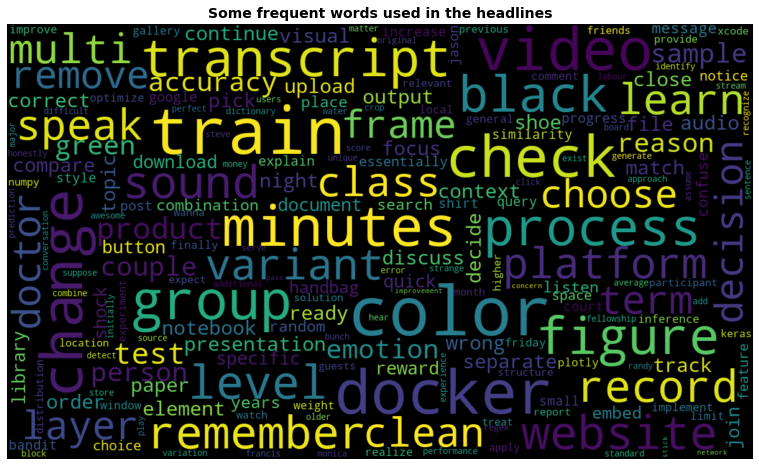

In [7]:

wordcloud = WordCloud(width=1200, height=700, random_state=21, max_font_size=110).generate(cleaned_combined_words)
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Some frequent words used in the headlines", weight='bold', fontsize=14)
plt.show()

In [8]:
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)

In [9]:
#text_data=[]

#for doc in all_words:
#    for token in doc:
#        if random.random() > .60:
#            text_data.append(token)
#all_words = [text_data]

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.   
alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior (we’ll use default for the base model).

In [22]:
np.random.seed(100)
# Create dictionary

dictionary = gensim.corpora.Dictionary(cleaned_docs)
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=100000) # optional

# Create Term Document Frequency or the Bag of Words
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_docs]

# create model
ldamodels = gensim.models.ldamodel.LdaModel(bow_corpus, num_topics = 4,id2word=dictionary, passes=50)


In [ ]:
ldamodels = gensim.models.LdaModel(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=4, 
                                       random_state=300,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [11]:
bow_corpus[0][0:5]

[(0, 1), (1, 8), (2, 2), (3, 1), (4, 1)]

In bow_corpus , Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).
For example, (1, 8) above implies, word id 1 occurs eight times in the first document. Likewise, word id 2 occurs twice and so on

In [23]:
for i in ldamodels.print_topics(num_words = 18): 
    for j in i: print (j)

0
0.007*"website" + 0.007*"record" + 0.007*"choice" + 0.007*"context" + 0.006*"choose" + 0.005*"sample" + 0.005*"decision" + 0.005*"space" + 0.005*"library" + 0.004*"gallery" + 0.004*"remember" + 0.004*"reward" + 0.003*"implement" + 0.003*"documentation" + 0.003*"variants" + 0.003*"notebook" + 0.003*"variant" + 0.003*"post"
1
0.014*"color" + 0.006*"website" + 0.005*"button" + 0.005*"elements" + 0.005*"optimize" + 0.005*"variant" + 0.005*"choose" + 0.004*"reward" + 0.004*"variants" + 0.004*"contextual" + 0.004*"green" + 0.004*"upload" + 0.004*"bandit" + 0.004*"test" + 0.003*"google" + 0.003*"platform" + 0.003*"multi" + 0.003*"black"
2
0.012*"process" + 0.012*"video" + 0.009*"transcript" + 0.007*"frame" + 0.006*"transcripts" + 0.006*"speak" + 0.005*"emotion" + 0.005*"accuracy" + 0.005*"couple" + 0.005*"class" + 0.005*"audio" + 0.004*"person" + 0.004*"record" + 0.004*"paper" + 0.004*"file" + 0.004*"topic" + 0.003*"level" + 0.003*"match"
3
0.014*"color" + 0.008*"black" + 0.006*"layer" + 0.

We see that :
Topic 0 : Website_Optimization
Topic 1 : Website_Optimization
Topic 2 : Speech_Diarization
Topic 3 : Embedder
    

autosampler-Onfido_2020-07-10_transcript.txt
Words: 31874
[('class', 20), ('train', 14), ('match', 14), ('decide', 10), ('francis', 9)]   
autosampler-Onfido_2020-07-17_transcript.txt
Words: 6622
[('experiment', 8), ('honestly', 5), ('beddings', 4), ('document', 4), ('explain', 3)]    
autosampler-Onfido_2020-07-13_transcript.txt
Words: 2948
[('hours', 4), ('presentation', 4), ('record', 3), ('francis', 2), ('slide', 2)]   
autosampler-Onfido_2020-07-02_transcript(5).txt
Words: 8466
[('sample', 12), ('tensorflow', 7), ('weight', 6), ('resolve', 5), ('layer', 4)]   
autosampler-Onfido_2020-07-22_transcript.txt
Words: 6534
[('layer', 7), ('train', 7), ('class', 5), ('convert', 4), ('numpy', 4)]     
autosampler-Onfido.m4a_transcript.txt
Words: 1254
[('loader', 2), ('respective', 2), ('level', 2), ('focus', 2), ('francis', 1)]   
autosampler-Onfido_2020-07-23_transcript.txt
Words: 9883
[('save', 6), ('shape', 5), ('closer', 3), ('weird', 3), ('remember', 3)]   






Embedder_2020-07-16_transcript.txt
Words: 33785
[('visual', 18), ('docker', 15), ('color', 13), ('doctor', 12), ('layer', 11)]   
Embedder_2020-07-03_transcript.txt
Words: 35368
[('train', 19), ('color', 9), ('noise', 7), ('check', 7), ('minutes', 6)]   
Embedder.m4a_transcript_1.txt
Words: 2349
[('layer', 4), ('years', 3), ('finally', 2), ('add', 2), ('black', 2)]   
Embedder.m4a_transcript_2.txt
Words: 2458
[('layer', 4), ('beauty', 2), ('master', 2), ('curious', 2), ('leaders', 2)]   
Embedder.m4a_transcript_3.txt
Words: 1641
[('minutes', 2), ('randi', 1), ('slack', 1), ('recursive', 1), ('xcode', 1)]   
Embedder_2020-07-10_transcript.txt
Words: 29216
[('color', 22), ('video', 9), ('guests', 8), ('group', 7), ('docker', 7)]  
Embedder_2020-07-02_transcript.txt
Words: 31580
[('docker', 20), ('color', 18), ('upload', 9), ('windows', 8), ('group', 7)]   
Embedder_2020-07-15_transcript.txt
Words: 33295
[('train', 14), ('layer', 12), ('docker', 11), ('check', 10), ('visual', 9)]   
Embedder_2020-07-13_transcript.txt
Words: 30838
[('multi', 14), ('black', 12), ('group', 8), ('track', 8), ('shirt', 8)]   
Embedder_2020-08-03_transcript.txt
Words: 33321
[('color', 43), ('check', 15), ('train', 12), ('black', 11), ('remember', 10)]   
Embedder_2020-07-28_transcript.txt
Words: 29705
[('color', 12), ('check', 11), ('docker', 7), ('percentage', 6), ('doctor', 6)]   
Embedder_2020-08-04_transcript.txt
Words: 19578
[('clean', 15), ('count', 10), ('older', 7), ('remove', 7), ('decision', 6)]   
Embedder_2020-07-23_transcript.txt
Words: 34646
[('black', 13), ('color', 10), ('query', 10), ('level', 8), ('change', 7)]   
Embedder.m4a_transcript.txt
Words: 458
[('join', 1), ('shoe', 1), ('train', 1), ('prove', 1), ('labour', 1)]   
Embedder_2020-07-22_transcript.txt
Words: 29990
[('platform', 12), ('color', 8), ('style', 8), ('video', 7), ('train', 6)]    






Website_Optimization_2020-07-20_transcript.txt
Words: 16448
[('elements', 17), ('train', 9), ('combination', 9), ('choose', 9), ('contextual', 9)]   
Website_Optimization_2020-08-03_transcript.txt
Words: 8542
[('website', 12), ('framework', 4), ('group', 3), ('field', 3), ('plug', 3)]   
Website_Optimization_2020-07-28_transcript.txt
Words: 3059
[('expect', 3), ('place', 2), ('variants', 2), ('shock', 2), ('michael', 2)]   
Website_Optimization_2020-08-04_transcript.txt
Words: 10413
[('documentation', 8), ('change', 6), ('comment', 6), ('press', 6), ('plug', 5)]   
Website_Optimization_2020-07-22_transcript.txt
Words: 8942
[('figure', 11), ('context', 6), ('notebook', 5), ('space', 4), ('reward', 4)]   
Website_Optimization_2020-07-23_transcript.txt
Words: 8411
[('decision', 12), ('context', 8), ('choose', 7), ('learn', 6), ('implement', 4)]   
Website_Optimization_2020-07-10_transcript.txt
Words: 7107
[('figure', 7), ('change', 7), ('choice', 6), ('local', 6), ('test', 4)]   
Website_Optimization_2020-07-02_transcript.txt
Words: 9879
[('button', 11), ('website', 7), ('change', 6), ('bandit', 6), ('tool', 6)]   
Website_Optimization_2020-07-03_transcript.txt
Words: 3196
[('docker', 4), ('bacon', 3), ('provide', 3), ('group', 3), ('promise', 2)]   
Website_Optimization_2020-07-16_transcript.txt
Words: 4748
[('device', 5), ('slider', 4), ('variants', 3), ('database', 3), ('server', 2)]   
Website_Optimization.m4a_transcript_Jul_29.txt
Words: 7432
[('figure', 7), ('train', 7), ('website', 6), ('variant', 6), ('online', 6)]   
Website_Optimization.m4a_transcript_1.txt
Words: 875
[('herbal', 1), ('cord', 1), ('jenga', 1), ('jingle', 1), ('lunch', 1)]   
Website_Optimization.m4a_transcript.txt
Words: 1703
[('reward', 3), ('space', 2), ('reach', 2), ('notebook', 2), ('dummy', 1)]   
Website_Optimization_2020-07-13_transcript.txt
Words: 8367
[('figure', 7), ('change', 6), ('variation', 6), ('library', 5), ('session', 4)]   
Website_Optimization_2020-07-01_transcript.txt
Words: 9558
[('optimize', 13), ('google', 6), ('check', 5), ('test', 4), ('website', 4)]   
Website_Optimization_2020-07-15_transcript.txt
Words: 10123
[('choice', 15), ('variants', 8), ('variant', 8), ('choose', 6), ('figure', 6)]    



Speech_Diarization_2020-07-10_transcript.txt
Words: 28382
[('video', 19), ('process', 16), ('train', 10), ('minutes', 9), ('frame', 9)]   
Speech_Diarization_2020-07-23_transcript.txt
Words: 22812
[('emotion', 9), ('train', 9), ('check', 6), ('change', 5), ('average', 5)]   
Speech_Diarization_2020-07-22_transcript.txt
Words: 40800
[('record', 18), ('process', 14), ('gallery', 13), ('emotion', 11), ('change', 7)]   
Speech_Diarization_2020-08-04_transcript.txt
Words: 28806
[('minutes', 37), ('transcript', 20), ('audio', 12), ('person', 12), ('video', 11)]   
Speech_Diarization.m4a_transcript.txt
Words: 761
[('gallery', 2), ('settings', 2), ('switch', 1), ('torture', 1), ('jamie', 1)]   
Speech_Diarization_2020-07-28_transcript.txt
Words: 17845
[('process', 15), ('tesseract', 8), ('frame', 6), ('library', 6), ('english', 5)]   
Speech_Diarization_2020-08-03_transcript.txt
Words: 23977
[('transcript', 19), ('transcripts', 18), ('group', 11), ('wrong', 8), ('file', 8)]   
Speech_Diarization_2020-07-15_transcript.txt
Words: 22155
[('stream', 9), ('video', 9), ('process', 9), ('frame', 8), ('train', 8)]   
Speech_Diarization_2020-07-13_transcript.txt
Words: 30214
[('frame', 19), ('process', 14), ('video', 13), ('file', 8), ('essence', 6)]   
Speech_Diarization.m4a_transcript_1.txt
Words: 2242
[('transcript', 4), ('transfer', 3), ('quality', 3), ('accuracy', 2), ('fee', 2)]   
Speech_Diarization.m4a_transcript_2.txt
Words: 1534
[('speak', 4), ('video', 3), ('active', 2), ('sign', 1), ('ship', 1)]   
Speech_Diarization_2020-07-16_transcript.txt
Words: 27079
[('speak', 10), ('process', 7), ('audio', 7), ('train', 7), ('transcripts', 7)]   

## Compute Model Coherence Score

In [14]:
from gensim.models import CoherenceModel
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodels, texts=cleaned_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3229292471717542


In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        print (num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

Let's plot the chart of coherence values for different topics

In [16]:
m,c = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=cleaned_docs, start=2, limit=10, step=1)

2
3
4
5
6
7
8
9


In [17]:
c

[0.18272473474140766,
 0.17934617783742576,
 0.1867592320869327,
 0.1787679053273132,
 0.1927218012819336,
 0.22723744904420842,
 0.24387639190582686,
 0.23941164597592815]

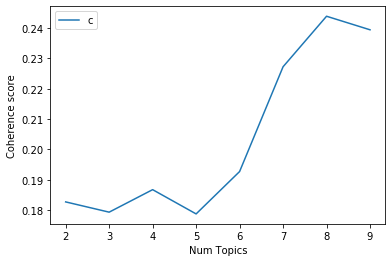

In [18]:
#model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=bow_corpus, texts=cleaned_docs, start=4, limit=5, step=1)
# Show graph
import matplotlib.pyplot as plt
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, c)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [19]:
ldamodels_8 = gensim.models.LdaModel(corpus=bow_corpus,
                                       id2word=dictionary,
                                       num_topics=8, 
                                       random_state=300,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)

In [20]:
for i in ldamodels_8.print_topics(num_words = 18): 
    for j in i: print (j)

0
0.010*"website" + 0.009*"elements" + 0.008*"bandit" + 0.008*"choose" + 0.008*"record" + 0.007*"contextual" + 0.007*"context" + 0.007*"reward" + 0.007*"button" + 0.006*"bandits" + 0.005*"library" + 0.005*"process" + 0.005*"users" + 0.005*"variants" + 0.005*"decision" + 0.005*"gallery" + 0.005*"variant" + 0.005*"space"
1
0.010*"clean" + 0.006*"remove" + 0.006*"count" + 0.005*"color" + 0.005*"noise" + 0.005*"doctor" + 0.004*"order" + 0.004*"pick" + 0.004*"older" + 0.003*"decision" + 0.003*"level" + 0.003*"remember" + 0.003*"shoe" + 0.003*"presentation" + 0.003*"product" + 0.003*"distribution" + 0.003*"randy" + 0.003*"class"
2
0.012*"video" + 0.012*"process" + 0.007*"frame" + 0.005*"level" + 0.005*"multi" + 0.004*"transcript" + 0.004*"crop" + 0.004*"message" + 0.004*"paper" + 0.004*"reason" + 0.004*"percentage" + 0.003*"couple" + 0.003*"accuracy" + 0.003*"library" + 0.003*"emotion" + 0.003*"recognize" + 0.003*"approach" + 0.003*"general"
3
0.010*"process" + 0.010*"transcript" + 0.009*"vi

Let’s call the function, and iterate it over the range of topics, alpha, and beta parameter values

In [21]:
# supporting function for alpha 
'''
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=10, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b,
                                           per_word_topics=True)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=cleaned_docs, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()
'''

In [ ]:
#import numpy as np
'''
import tqdm
grid = {}
grid['Validation_Set'] = {}
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(bow_corpus)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(bow_corpus, int(num_of_docs*0.75)), 
               bow_corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()
'''


  0%|          | 1/540 [00:00<06:24,  1.40it/s]

In [13]:
# multicore model
#lda_model_multicore = gensim.models.LdaMulticore(bow_corpus, num_topics=4, id2word=dictionary, passes=2,workers=2)
#for idx, topic in lda_model_multicore.print_topics(-1):
#    print('Topic: {} \nWords: {}'.format(idx, topic))

In [14]:
#tdidf
#from gensim import corpora, models
#tfidf = models.TfidfModel(bow_corpus)
#corpus_tfidf = tfidf[bow_corpus]
#lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2, workers=4)
#for idx, topic in lda_model_tfidf.print_topics(-1):
#    print('Topic: {} Word: {}'.format(idx, topic))

In [15]:
#from pprint import pprint
#for doc in corpus_tfidf:
#    pprint(doc)
#    break

## Visualising using pyLDAvis

In [24]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodels, bow_corpus, dictionary=ldamodels.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.089032 -0.071471       1        1  34.643124
2     -0.115966 -0.063446       2        1  32.383110
1      0.068465  0.041900       3        1  18.138384
0     -0.041531  0.093017       4        1  14.835392, topic_info=             Term        Freq       Total Category  logprob  loglift
395         color  128.000000  128.000000  Default  30.0000  30.0000
1428   transcript   46.000000   46.000000  Default  29.0000  29.0000
1429  transcripts   35.000000   35.000000  Default  28.0000  28.0000
1184       choice   18.000000   18.000000  Default  27.0000  27.0000
625       process   82.000000   82.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
597        output    7.502625   29.892965   Topic4  -5.7975   0.5258
652      relevant    6.367294   16.721525   Topic4  -5.9616   0.9426
306          test    7.057516   37.288681   Topic4  -5.8587   0.2436
264         shock    6.413583   24.492538   Topic4  -5.9544   0.5682
900        google    6.411743   25.773743   Topic4  -5.9547   0.5169

[298 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1         1  0.330910   accuracy
1         2  0.661820   accuracy
1         3  0.025455   accuracy
2000      2  0.962075   accurate
2506      4  0.924028     afloat
...     ...       ...        ...
1655      4  0.887938  wordpress
762       1  0.211585      wrong
762       2  0.544075      wrong
762       3  0.151132      wrong
762       4  0.090679      wrong

[526 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

## Testing on unknown document

### Testing FILE 1 : autosampler-Onfido_2020-07-24_transcript.txt

In [28]:
unseen_doc_file_path = './transcripts/test/autosampler-Onfido_2020-07-24_transcript.txt'
combined_words = ""
docs = []
data = open(unseen_doc_file_path).readlines()
speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
words_in_file = ""
speaker_dic ={}
for name,words in  speaker_data.items():
    words = words.replace("\n","").lower()
    words_in_file = words_in_file + words
    if name.split("_")[0] in speaker_dic:
        speaker_dic[name.split("_")[0]] += words
    else:
        speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
combined_words += words_in_file
docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
        
bow_vector = dictionary.doc2bow(cleaned_docs[0])

for index, score in sorted(ldamodels[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodels.print_topic(index, 7)))       
    

Score: 0.5051146149635315	 Topic: 0.012*"process" + 0.012*"video" + 0.009*"transcript" + 0.007*"frame" + 0.006*"transcripts" + 0.006*"speak" + 0.005*"emotion"
Score: 0.35782715678215027	 Topic: 0.014*"color" + 0.008*"black" + 0.006*"layer" + 0.006*"clean" + 0.006*"visual" + 0.006*"platform" + 0.005*"level"
Score: 0.08517561852931976	 Topic: 0.007*"website" + 0.007*"record" + 0.007*"choice" + 0.007*"context" + 0.006*"choose" + 0.005*"sample" + 0.005*"decision"
Score: 0.05188261717557907	 Topic: 0.014*"color" + 0.006*"website" + 0.005*"button" + 0.005*"elements" + 0.005*"optimize" + 0.005*"variant" + 0.005*"choose"


In [26]:
res = ldamodels[bow_vector]

In [27]:
print (res)

[(0, 0.08517027), (1, 0.051886637), (2, 0.50511754), (3, 0.35782555)]


 ###  Result : Incorrectly identified File 1(Autosampler) as "Speech_Diarization"

### Testing FILE 2  : Embedder_2020-07-14_transcript.txt

In [29]:
unseen_doc_file_path = './transcripts/test/Embedder_2020-07-14_transcript.txt'
combined_words = ""
docs = []
data = open(unseen_doc_file_path).readlines()
speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
words_in_file = ""
speaker_dic ={}
for name,words in  speaker_data.items():
    words = words.replace("\n","").lower()
    words_in_file = words_in_file + words
    if name.split("_")[0] in speaker_dic:
        speaker_dic[name.split("_")[0]] += words
    else:
        speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
combined_words += words_in_file
docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
        
bow_vector = dictionary.doc2bow(cleaned_docs[0])

for index, score in sorted(ldamodels[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodels.print_topic(index, 7))) 


Score: 0.6805766224861145	 Topic: 0.014*"color" + 0.008*"black" + 0.006*"layer" + 0.006*"clean" + 0.006*"visual" + 0.006*"platform" + 0.005*"level"
Score: 0.15766967833042145	 Topic: 0.012*"process" + 0.012*"video" + 0.009*"transcript" + 0.007*"frame" + 0.006*"transcripts" + 0.006*"speak" + 0.005*"emotion"
Score: 0.11608293652534485	 Topic: 0.014*"color" + 0.006*"website" + 0.005*"button" + 0.005*"elements" + 0.005*"optimize" + 0.005*"variant" + 0.005*"choose"
Score: 0.045670777559280396	 Topic: 0.007*"website" + 0.007*"record" + 0.007*"choice" + 0.007*"context" + 0.006*"choose" + 0.005*"sample" + 0.005*"decision"


In [30]:
res = ldamodels[bow_vector]
print (res)

[(0, 0.0456726), (1, 0.11607815), (2, 0.15767427), (3, 0.68057495)]


### Result File 2 : Correctly identified as "Embedder"

### Testing FILE 3  : Speech_Diarization_2020-07-14_transcript.txt

In [32]:
unseen_doc_file_path = './transcripts/test/Speech_Diarization_2020-07-14_transcript.txt'
combined_words = ""
docs = []
data = open(unseen_doc_file_path).readlines()
speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
words_in_file = ""
speaker_dic ={}
for name,words in  speaker_data.items():
    words = words.replace("\n","").lower()
    words_in_file = words_in_file + words
    if name.split("_")[0] in speaker_dic:
        speaker_dic[name.split("_")[0]] += words
    else:
        speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
combined_words += words_in_file
docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
        
bow_vector = dictionary.doc2bow(cleaned_docs[0])

for index, score in sorted(ldamodels[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodels.print_topic(index, 7))) 

Score: 0.753900408744812	 Topic: 0.012*"process" + 0.012*"video" + 0.009*"transcript" + 0.007*"frame" + 0.006*"transcripts" + 0.006*"speak" + 0.005*"emotion"
Score: 0.09837348014116287	 Topic: 0.014*"color" + 0.006*"website" + 0.005*"button" + 0.005*"elements" + 0.005*"optimize" + 0.005*"variant" + 0.005*"choose"
Score: 0.07428346574306488	 Topic: 0.014*"color" + 0.008*"black" + 0.006*"layer" + 0.006*"clean" + 0.006*"visual" + 0.006*"platform" + 0.005*"level"
Score: 0.07344264537096024	 Topic: 0.007*"website" + 0.007*"record" + 0.007*"choice" + 0.007*"context" + 0.006*"choose" + 0.005*"sample" + 0.005*"decision"


In [33]:
res = ldamodels[bow_vector]
print (res)

[(0, 0.073442586), (1, 0.098373525), (2, 0.7539004), (3, 0.07428346)]


### Result File 3 : Correctly identified as "Speech_Diarization"

### Testing FILE 4  : Website_Optimization_2020-07-14_transcript.txt

In [35]:
unseen_doc_file_path = './transcripts/test/Website_Optimization_2020-07-14_transcript.txt'
combined_words = ""
docs = []
data = open(unseen_doc_file_path).readlines()
speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
words_in_file = ""
speaker_dic ={}
for name,words in  speaker_data.items():
    words = words.replace("\n","").lower()
    words_in_file = words_in_file + words
    if name.split("_")[0] in speaker_dic:
        speaker_dic[name.split("_")[0]] += words
    else:
        speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
combined_words += words_in_file
docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
        
bow_vector = dictionary.doc2bow(cleaned_docs[0])

for index, score in sorted(ldamodels[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodels.print_topic(index, 7))) 

Score: 0.4398719370365143	 Topic: 0.007*"website" + 0.007*"record" + 0.007*"choice" + 0.007*"context" + 0.006*"choose" + 0.005*"sample" + 0.005*"decision"
Score: 0.3983258008956909	 Topic: 0.014*"color" + 0.006*"website" + 0.005*"button" + 0.005*"elements" + 0.005*"optimize" + 0.005*"variant" + 0.005*"choose"
Score: 0.08139380067586899	 Topic: 0.014*"color" + 0.008*"black" + 0.006*"layer" + 0.006*"clean" + 0.006*"visual" + 0.006*"platform" + 0.005*"level"
Score: 0.08040843904018402	 Topic: 0.012*"process" + 0.012*"video" + 0.009*"transcript" + 0.007*"frame" + 0.006*"transcripts" + 0.006*"speak" + 0.005*"emotion"


In [36]:
res = ldamodels[bow_vector]
print (res)

[(0, 0.43987888), (1, 0.39831966), (2, 0.08040938), (3, 0.08139209)]


### Result File 4 : Correctly identified as "Website_Optimization"

## TF-IDF

In [79]:
# reading all documents
combined_words = ""
docs = []
for transcript_file_name in glob.iglob('./transcripts/train//*.*', recursive=True):
    #print(os.path.basename(transcript_file_name))
    data = open(transcript_file_name).readlines()
    speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
    words_in_file = ""
    speaker_dic ={}
    for name,words in  speaker_data.items():
        words = words.replace("\n","").lower()
        words_in_file = words_in_file + words
        if name.split("_")[0] in speaker_dic:
            speaker_dic[name.split("_")[0]] += words
        else:
            speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
    combined_words += words_in_file
    docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
dictionary = gensim.corpora.Dictionary(cleaned_docs)
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=100000) # optional
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


In [80]:
# lda model on tf-idf

lda_model_tfidf = gensim.models.ldamodel.LdaModel(corpus_tfidf, num_topics=4, id2word=dictionary, passes=2)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"color" + 0.001*"context" + 0.001*"reward" + 0.001*"decision" + 0.001*"class" + 0.001*"clean" + 0.001*"feature" + 0.001*"notebook" + 0.001*"space" + 0.001*"figure"
Topic: 1 Word: 0.001*"transcript" + 0.001*"settings" + 0.001*"video" + 0.001*"gallery" + 0.001*"transcripts" + 0.001*"speak" + 0.001*"website" + 0.001*"active" + 0.001*"torture" + 0.001*"applicability"
Topic: 2 Word: 0.001*"transcript" + 0.001*"quality" + 0.001*"layer" + 0.001*"loader" + 0.001*"respective" + 0.001*"shape" + 0.001*"cable" + 0.001*"transfer" + 0.001*"tryingto" + 0.001*"prince"
Topic: 3 Word: 0.001*"elements" + 0.001*"variant" + 0.001*"experiment" + 0.001*"contextual" + 0.001*"variants" + 0.001*"color" + 0.001*"honestly" + 0.001*"online" + 0.001*"reward" + 0.001*"figure"


In [81]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, dictionary=lda_model_tfidf.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.004125 -0.001243       1        1  41.223698
3      0.000218  0.003544       2        1  26.946121
1      0.000749 -0.000568       3        1  15.931068
2      0.003158 -0.001732       4        1  15.899115, topic_info=             Term      Freq     Total Category  logprob  loglift
763    transcript  0.000000  0.000000  Default  30.0000  30.0000
1597      quality  0.000000  0.000000  Default  29.0000  29.0000
703      settings  0.000000  0.000000  Default  28.0000  28.0000
2694   respective  0.000000  0.000000  Default  27.0000  27.0000
764   transcripts  0.000000  0.000000  Default  26.0000  26.0000
...           ...       ...       ...      ...      ...      ...
1069    inference  0.036341  0.155884   Topic4  -7.2383   0.3827
160        labour  0.035600  0.150964   Topic4  -7.2590   0.3942
347         years  0.032330  0.132701   Topic4  -7.3553   0.4268
868          shoe  0.035216  0.173700   Topic4  -7.2698   0.2431
187       minutes  0.033940  0.159670   Topic4  -7.3067   0.2904

[188 rows x 6 columns], token_table=Empty DataFrame
Columns: [Topic, Freq, Term]
Index: [], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 2, 3])

In [82]:
unseen_doc_file_path = './transcripts/test/autosampler-Onfido_2020-07-24_transcript.txt'
combined_words = ""
docs = []
data = open(unseen_doc_file_path).readlines()
speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
words_in_file = ""
speaker_dic ={}
for name,words in  speaker_data.items():
    words = words.replace("\n","").lower()
    words_in_file = words_in_file + words
    if name.split("_")[0] in speaker_dic:
        speaker_dic[name.split("_")[0]] += words
    else:
        speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
combined_words += words_in_file
docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_docs]       
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
for index, score in sorted(lda_model_tfidf[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.9416021108627319	 
Topic: 0.001*"color" + 0.001*"context" + 0.001*"reward" + 0.001*"decision" + 0.001*"class" + 0.001*"clean" + 0.001*"feature" + 0.001*"notebook" + 0.001*"space" + 0.001*"figure"

Score: 0.05445738509297371	 
Topic: 0.001*"transcript" + 0.001*"quality" + 0.001*"layer" + 0.001*"loader" + 0.001*"respective" + 0.001*"shape" + 0.001*"cable" + 0.001*"transfer" + 0.001*"tryingto" + 0.001*"prince"


In [83]:
res_tfidf = lda_model_tfidf[bow_corpus[0]]

In [84]:
print(res_tfidf)

[(0, 0.9416046), (2, 0.054454796)]


## word2vec

In [40]:
from gensim.models import Word2Vec
# reading all documents
combined_words = ""
docs = []
for transcript_file_name in glob.iglob('./transcripts/train//*.*', recursive=True):
    #print(os.path.basename(transcript_file_name))
    data = open(transcript_file_name).readlines()
    speaker_data = {line.split(":")[0]:line.split(":")[1] for line in data}
    words_in_file = ""
    speaker_dic ={}
    for name,words in  speaker_data.items():
        words = words.replace("\n","").lower()
        words_in_file = words_in_file + words
        if name.split("_")[0] in speaker_dic:
            speaker_dic[name.split("_")[0]] += words
        else:
            speaker_dic[name.split("_")[0]] = words
    #print("Number of words in the file :",str(len(words_in_file)))
    combined_words += words_in_file
    docs.append([words_in_file])
cleaned_docs = []
for doc in docs:
    for word in doc:
        cd = preprocess(word)
        cleaned_docs.append(cd)
dictionary = gensim.corpora.Dictionary(cleaned_docs)
dictionary.filter_extremes(no_below=1, no_above=0.5, keep_n=100000) # optional
bow_corpus = [dictionary.doc2bow(doc) for doc in cleaned_docs]





word2vec = Word2Vec(cleaned_docs, min_count=2)

In [41]:
vocabulary = word2vec.wv.vocab
#print(vocabulary)

In [87]:
v1 = word2vec.wv['neural']

In [88]:
sim_words = word2vec.wv.most_similar('neural')

In [89]:
print(sim_words)

[('general', 0.3857870101928711), ('kick', 0.37261030077934265), ('steve', 0.3494763672351837), ('shape', 0.3194296956062317), ('inference', 0.31932297348976135), ('check', 0.31160661578178406), ('complex', 0.30956199765205383), ('dollarization', 0.3031412363052368), ('process', 0.2970508635044098), ('offline', 0.29346591234207153)]


In [90]:
sim_words = word2vec.wv.most_similar('docker')

In [91]:
print(sim_words)

[('term', 0.7552686929702759), ('change', 0.7510859966278076), ('mention', 0.746822714805603), ('check', 0.7411278486251831), ('website', 0.7409422397613525), ('train', 0.7346232533454895), ('decision', 0.7325979471206665), ('accuracy', 0.7321577668190002), ('minutes', 0.7293246984481812), ('group', 0.7233571410179138)]


In [92]:
sim_words = word2vec.wv.most_similar('bandit')
print(sim_words)

[('website', 0.667845606803894), ('figure', 0.6454590559005737), ('change', 0.6449595093727112), ('group', 0.6318775415420532), ('transcripts', 0.6302740573883057), ('morning', 0.620402991771698), ('pick', 0.6147583723068237), ('transcript', 0.6083872318267822), ('question', 0.6025809645652771), ('night', 0.6022604703903198)]


In [93]:
sim_words = word2vec.wv.most_similar('pandas')
print(sim_words)

[('figure', 0.42038166522979736), ('decision', 0.41287657618522644), ('topic', 0.39887240529060364), ('money', 0.39873063564300537), ('read', 0.3836823105812073), ('morning', 0.38145947456359863), ('discuss', 0.37288641929626465), ('term', 0.37287354469299316), ('improvements', 0.366554856300354), ('school', 0.36414095759391785)]


In [94]:
sim_words = word2vec.wv.most_similar('javascript')
print(sim_words)

[('elaborate', 0.3793071210384369), ('country', 0.3689544200897217), ('include', 0.36818891763687134), ('spend', 0.3608289361000061), ('simon', 0.35410258173942566), ('improvements', 0.3515055179595947), ('average', 0.34761112928390503), ('term', 0.3468155860900879), ('upbeat', 0.3463149666786194), ('strange', 0.34565067291259766)]


In [95]:
sim_words = word2vec.wv.most_similar('emotion')
print(sim_words)

[('train', 0.6752421855926514), ('term', 0.6426206827163696), ('process', 0.6340951919555664), ('platform', 0.6257979869842529), ('wrong', 0.6229022741317749), ('morning', 0.6225557923316956), ('remove', 0.6219379901885986), ('question', 0.6199366450309753), ('change', 0.6169086694717407), ('minutes', 0.6142536401748657)]


In [96]:
sim_words = word2vec.wv.most_similar('video')
print(sim_words)

[('train', 0.7212331295013428), ('minutes', 0.6997057199478149), ('transcripts', 0.6890528202056885), ('term', 0.6845047473907471), ('transcript', 0.6805715560913086), ('class', 0.6776399612426758), ('wrong', 0.668642520904541), ('figure', 0.6678212881088257), ('issue', 0.6668709516525269), ('check', 0.6658070087432861)]


In [97]:
len(word2vec.wv.vectors)

1283

In [98]:
w2v_corpus = []
for  w in word2vec.wv.vectors:
    i=0
    w1 =[]
    for vec in w:
        wv = (i,vec)
        w1.append(wv)
        i+=1
    w2v_corpus.append(list(w1))

In [100]:
word2vec.wv.vocab.keys()
w2v_dic = {}
i=0
for word in word2vec.wv.vocab.keys():
    w2v_dic[i] = word
    i+=1
    
    

In [102]:
ldamodels_wor2vec = gensim.models.ldamodel.LdaModel(w2v_corpus, num_topics = 4, id2word=w2v_dic, passes=30)

/opt/anaconda3/lib/python3.7/site-packages/gensim/models/ldamodel.py:609: RuntimeWarning: overflow encountered in exp
  self.expElogbeta = np.exp(current_Elogbeta)


In [103]:
for i in ldamodels_wor2vec.print_topics(num_words = 18): 
    for j in i: print (j)

0
nan*"percentage" + nan*"award" + nan*"title" + nan*"accurate" + nan*"portion" + nan*"develop" + nan*"early" + nan*"simply" + nan*"open" + nan*"harmon" + nan*"corpus" + nan*"afternoon" + nan*"corporate" + nan*"defect" + nan*"bacon" + nan*"relative" + nan*"ocean" + nan*"attribute"
1
nan*"percentage" + nan*"award" + nan*"title" + nan*"accurate" + nan*"portion" + nan*"develop" + nan*"early" + nan*"simply" + nan*"open" + nan*"harmon" + nan*"corpus" + nan*"afternoon" + nan*"corporate" + nan*"defect" + nan*"bacon" + nan*"relative" + nan*"ocean" + nan*"attribute"
2
nan*"percentage" + nan*"award" + nan*"title" + nan*"accurate" + nan*"portion" + nan*"develop" + nan*"early" + nan*"simply" + nan*"open" + nan*"harmon" + nan*"corpus" + nan*"afternoon" + nan*"corporate" + nan*"defect" + nan*"bacon" + nan*"relative" + nan*"ocean" + nan*"attribute"
3
nan*"percentage" + nan*"award" + nan*"title" + nan*"accurate" + nan*"portion" + nan*"develop" + nan*"early" + nan*"simply" + nan*"open" + nan*"harmon" +